<a href="https://colab.research.google.com/github/gyuholee94/NLP/blob/master/CNN_Ver_2(val_0_8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pickle

In [7]:
with open('news_train_data.pickle', 'rb') as f: #불러오기
    train_data = pickle.load(f)

In [6]:
with open('news_test_data.pickle', 'rb') as f: #불러오기
    test_data = pickle.load(f)

In [8]:
k = train_data['train_words_all']
train_words_all = list(k)
type(train_words_all)

list

In [9]:
k = test_data['test_words_all']
test_words_all = list(k)
type(test_words_all)

list

# 데이터들을 리스트로!
train_words_all / test_words_all / train_words_some / test_words_some

In [10]:
#명령어
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras import layers
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Flatten, MaxPooling1D, Input, Concatenate
from keras.models import load_model
from keras import regularizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Input, layers
from keras.models import load_model

In [13]:
#파라미터
vocab_size = 30000
embedding_dim = 50
max_length = 70
truct_type = 'pre'
padding_type = 'pre'
oov_tok = '<OOV>'

In [ ]:
{
  "max_len": 70,
  "pad_type": "post",
  "trunc_type": "post"
}

In [18]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_words_all)
word_index = tokenizer.word_index

training_sequences  = tokenizer.texts_to_sequences(train_words_all)
training_padded = pad_sequences(training_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=truct_type)

testing_sequences  = tokenizer.texts_to_sequences(test_words_all)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=truct_type)

In [34]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
training_padded = np.array(training_padded)
training_labels = np.array(train_data['label'])

testing_padded = np.array(testing_padded)
testing_labels = np.array(test_data['label'])

In [27]:
sequence_input = tf.keras.Input(shape=(max_length,), dtype='int32')
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                            embedding_dim,
                                            input_length=max_length,
                                            trainable=False)
embedded_sequences = embedding_layer(sequence_input)
convs = []
filter_sizes = [3,4,5]
for fsz in filter_sizes:

    x = tf.keras.layers.Conv1D(100, fsz, activation='relu',padding='same')(embedded_sequences)
    x = tf.keras.layers.MaxPooling1D()(x)
    convs.append(x)

x = tf.keras.layers.Concatenate(axis=-1)(convs)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

x = tf.keras.layers.Dropout(0.5)(x)

output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(sequence_input, output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 70)]         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 70, 50)       1500000     input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 70, 100)      15100       embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 70, 100)      20100       embedding_4[0][0]                
_______________________________________________________________________________________

In [28]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
num_epochs = 20
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2, callbacks=[callback])


Epoch 1/20
4569/4569 - 116s - loss: 0.4204 - accuracy: 0.8054 - val_loss: 0.4368 - val_accuracy: 0.7912
Epoch 2/20
4569/4569 - 118s - loss: 0.3934 - accuracy: 0.8227 - val_loss: 0.4285 - val_accuracy: 0.7950
Epoch 3/20
4569/4569 - 118s - loss: 0.3699 - accuracy: 0.8350 - val_loss: 0.4167 - val_accuracy: 0.8043
Epoch 4/20
4569/4569 - 118s - loss: 0.3489 - accuracy: 0.8467 - val_loss: 0.4197 - val_accuracy: 0.8027
Epoch 5/20
4569/4569 - 116s - loss: 0.3299 - accuracy: 0.8577 - val_loss: 0.4323 - val_accuracy: 0.8021
Epoch 6/20
4569/4569 - 114s - loss: 0.3124 - accuracy: 0.8684 - val_loss: 0.4383 - val_accuracy: 0.8023
Epoch 7/20
4569/4569 - 116s - loss: 0.2956 - accuracy: 0.8763 - val_loss: 0.4478 - val_accuracy: 0.8003
Epoch 8/20
4569/4569 - 116s - loss: 0.2790 - accuracy: 0.8842 - val_loss: 0.4451 - val_accuracy: 0.8033


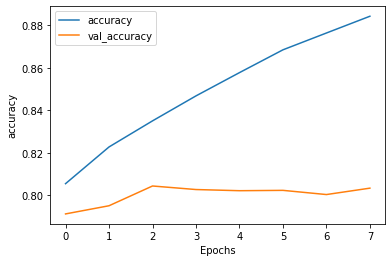

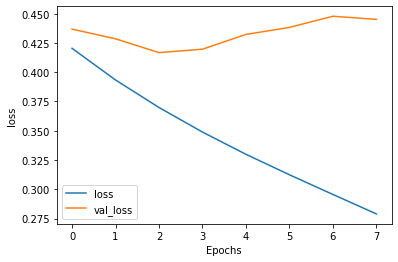

In [35]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [36]:
!mkdir -p saved_model
model.save('saved_model_naver/my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model_naver/my_model/assets
